# Form factor convergence

In [2]:
#define all relevant functions
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [3]:
def read_dataff(file_name):
    #This is specific to a file with no headings and in the form of:  k20_kf_5/2NN_0.00_0.0_20_5.out FL 9.01759e-06 1m43.863s
    f = open(file_name, 'r')
    data = []
    for line in f:
        l = line.split()

        if len(l) != 4:
            continue
        else:

            file= l[0].split("/")[-1].split("_") 
            U = float(file[1])  #stores U parameter
            J = float(file[2])  # stores J parameter 
            ff = float(file[3])
            nk = int(file[4])   #stores nk number points
            nkf = int(file[5].split(".")[0])   #stores nkf number points

            time= l[3].split("m")   #time taken to perform the calculation
            seconds = float(time[0])*60 + float(time[1].split("s")[0])
            final_data = [U, J, ff, nk, nkf,l[1],float(l[2]),seconds]  #l1 and l2 here are the Tc and the dominanting phase
            data.append(final_data)

    return data


In [7]:

def plot_ff_convergence(inputname, model):
    data = read_dataff(inputname)

    #kb_ev = 8.6173303e-5 #eV
    
    Us = []  #stores Us
    mus = []  #stores Js
    groundstate = []
    points = []
    tc = []
    ffs =[]
    times = []
    kb_ev = 1
    for d in data:
        Us.append(d[0])
        mus.append(d[1])
        points.append([d[0],d[1]])  #U,J vector
        groundstate.append(d[5])  #Stores GS
        ffs.append(d[2])
        tc.append((d[6])/kb_ev)  #stores Tc
        times.append(d[7])
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid()

    fig, ax2 = plt.subplots(figsize=(6, 6))


    # Color mapping
    # Color mapping
    color_map = {
        "SC": "blue",
        "CDW": "orange",
        "FL": "black",
        "SDW": "green"
    }

    labels_added = {}

    for i in range(len(ffs)):
        state = groundstate[i]
        colour = color_map.get(state, "white")

    # Add label only if it hasn't been added before
        label = state if state not in labels_added else None
        labels_added[state] = True  # Mark label as used

        ax.scatter(ffs[i], tc[i], c=colour, s=20, marker="x", label=label)
        ax2.scatter(ffs[i], times[i], c = colour, s =20, marker = "x", label= label)




   # for i in range(len(ffs)):
    
#    if groundstate[i] == "SC":
 #           colour = 'blue'
  #      elif groundstate[i] == "CDW":
   #         colour = 'orange'
    #    elif groundstate[i] == "FL":
     #       colour="black"
      #  elif groundstate[i] == "SDW":
       #     colour="green"
        #else:
         #   colour="white"
        #ax.scatter(ffs[i], tc[i], c=colour, s=20,marker="x")

    U = Us[0]
    mu = mus[0]

    ax.set_title(f"Form factor convergence for the {model} with U = {U} and $\mu$ = {mu}")
    ax.set_xlabel("Form factor ($\AA$)")
    ax.set_ylabel("Tc (ev)")
    ax.plot(ffs, tc, color = 'black', linestyle = '--')
    ax2.plot(ffs, times, color = 'black', linestyle = '--')
    ax2.set_title(f"Time taken as a function of Form factor for the {model} with U = {U} and $\mu$ = {mu}")
    ax2.set_xlabel("Form factor ($\AA$)")
    ax2.set_ylabel("Time (s)")
    ax2.legend()
    ax2.grid()
    
    ax.legend()
    plt.show()


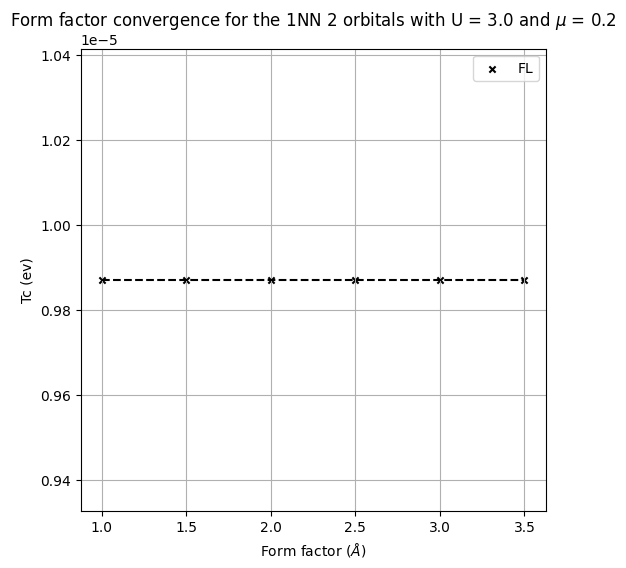

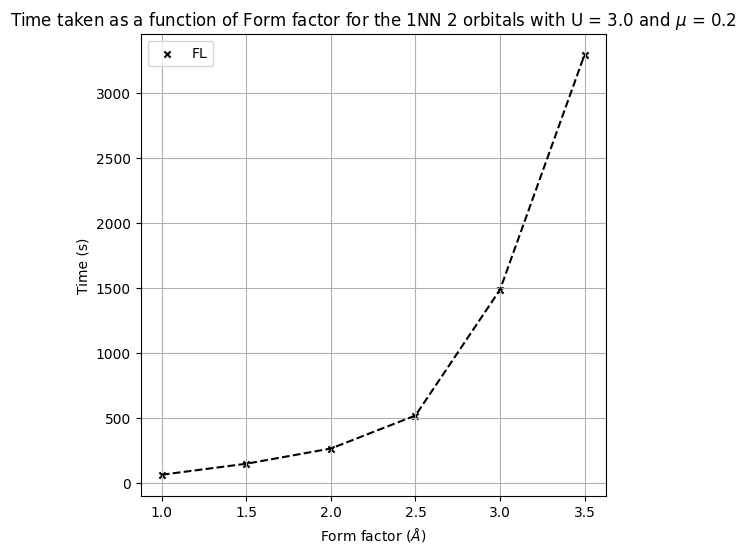

In [8]:
plot_ff_convergence("1NN_2orbs_3_2_ff.log", "1NN 2 orbitals")